# BI Assignment 3


### Prerequisites

In [2]:
!pip install auto-sklearn

     ---------------------------------------- 6.5/6.5 MB 5.8 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [17 lines of output]
  Traceback (most recent call last):
    File "D:\Anaconda\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py", line 363, in <module>
      main()
    File "D:\Anaconda\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py", line 345, in main
      json_out['return_val'] = hook(**hook_input['kwargs'])
    File "D:\Anaconda\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py", line 130, in get_requires_for_build_wheel
      return hook(config_settings)
    File "C:\Users\Radoslav Gajanin\AppData\Local\Temp\pip-build-env-2ros9m45\overlay\Lib\site-packages\setuptools\build_meta.py", line 338, in get_requires_for_build_wheel
      return self._get_build_requires(config_settings, requirements=['wheel'])
    File "C:\Users\Radoslav Gajanin\AppData\Local\Temp\pip-build-env-2ros9m45\overlay\Lib\site-packages\setuptools

In [12]:
import nltk
nltk.download('wordnet')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from pandas_profiling import ProfileReport

In [13]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [14]:
plt.style.use('seaborn-muted')

### Reading the data and basic exploration

In [15]:
df = pd.read_csv('it_courses_udemy.csv')

In [16]:
df.head()

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,/course/pmp-pmbok6-35-pdus/,True,155282,4.59491,4.59326,4.59326,52653,False,292,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,4.53772,46447,False,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836,4.47080,4.47173,4.47173,41630,False,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,INR,₹455,8640.0,INR,"₹8,640"


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22853 entries, 0 to 22852
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            22853 non-null  int64  
 1   title                         22853 non-null  object 
 2   url                           22853 non-null  object 
 3   is_paid                       22853 non-null  bool   
 4   num_subscribers               22853 non-null  int64  
 5   avg_rating                    22853 non-null  float64
 6   avg_rating_recent             22853 non-null  float64
 7   rating                        22853 non-null  float64
 8   num_reviews                   22853 non-null  int64  
 9   is_wishlisted                 22853 non-null  bool   
 10  num_published_lectures        22853 non-null  int64  
 11  num_published_practice_tests  22853 non-null  int64  
 12  created                       22853 non-null  object 
 13  p

In [18]:
df.shape

(22853, 20)

In [19]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
id,22853.0,1.818466e+06,927352.464985,2762.0,1.090694e+06,1.824268e+06,2.604580e+06,3486006.0
num_subscribers,22853.0,3.205448e+03,11051.296472,0.0,7.600000e+01,5.590000e+02,2.483000e+03,564444.0
avg_rating,22853.0,3.952356e+00,0.875152,0.0,3.750000e+00,4.150000e+00,4.435480e+00,5.0
avg_rating_recent,22853.0,3.937739e+00,0.888605,0.0,3.732460e+00,4.148680e+00,4.433520e+00,5.0
rating,22853.0,3.937739e+00,0.888605,0.0,3.732460e+00,4.148680e+00,4.433520e+00,5.0
num_reviews,22853.0,2.702776e+02,2048.788093,0.0,8.000000e+00,2.700000e+01,9.800000e+01,188941.0
num_published_lectures,22853.0,3.491721e+01,48.652820,0.0,1.100000e+01,2.200000e+01,4.100000e+01,699.0
num_published_practice_tests,22853.0,3.752243e-01,1.160939,0.0,0.000000e+00,0.000000e+00,0.000000e+00,6.0
discount_price__amount,21024.0,4.862661e+02,234.100393,455.0,4.550000e+02,4.550000e+02,4.550000e+02,3200.0
price_detail__amount,22356.0,4.445518e+03,3098.531678,1280.0,1.280000e+03,3.200000e+03,8.640000e+03,12800.0


In [20]:
df['created'] = pd.to_datetime(df['created'])
df['published_time'] = pd.to_datetime(df['published_time'])

Adding date as integer

In [21]:
df['created_int'] = pd.to_numeric(df['created'])
df['published_time_int'] = pd.to_numeric(df['published_time'])

<BarContainer object of 2 artists>

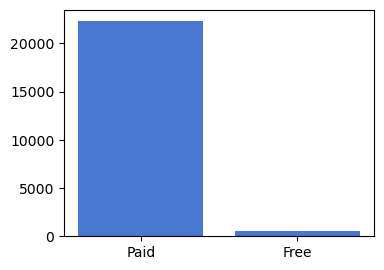

In [22]:
plt.figure(figsize=(4, 3), dpi=100)
plt.bar(['Paid', 'Free'] , df.is_paid.value_counts())

(array([2.1416e+04, 8.6500e+02, 2.8700e+02, 1.1200e+02, 4.6000e+01,
        3.5000e+01, 2.2000e+01, 1.9000e+01, 1.1000e+01, 7.0000e+00,
        6.0000e+00, 3.0000e+00, 3.0000e+00, 1.0000e+00, 4.0000e+00,
        2.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([     0.  ,  11288.88,  22577.76,  33866.64,  45155.52,  56444.4 ,
         67733.28,  79022.16,  90311.04, 101599.92, 112888.8 , 124177.68,
        135466.56, 146755.44, 158044.32, 169333.2 , 180622.08, 191910.96,
        203199.84, 214488.72, 225777.6 , 237066.48, 248355.36, 259644.24,
        270933.12, 282

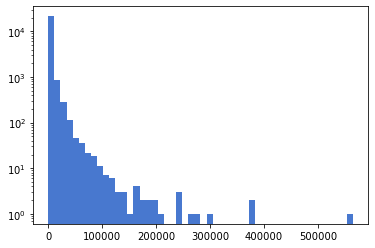

In [23]:
plt.hist(df['num_subscribers'], bins=50, log=True)

(array([2.150e+02, 0.000e+00, 1.690e+02, 0.000e+00, 1.210e+02, 9.900e+01,
        1.860e+02, 2.010e+02, 2.000e+02, 4.080e+02, 4.110e+02, 6.090e+02,
        6.100e+02, 6.240e+02, 7.870e+02, 7.930e+02, 7.190e+02, 7.710e+02,
        7.990e+02, 7.230e+02, 7.550e+02, 7.530e+02, 7.690e+02, 7.890e+02,
        8.190e+02, 9.330e+02, 1.237e+03, 1.039e+03, 1.073e+03, 1.015e+03,
        9.510e+02, 8.500e+02, 7.730e+02, 5.980e+02, 5.140e+02, 4.130e+02,
        3.380e+02, 2.480e+02, 2.000e+02, 1.190e+02, 8.300e+01, 4.700e+01,
        3.700e+01, 2.400e+01, 1.000e+01, 1.000e+01, 5.000e+00, 3.000e+00,
        2.000e+00, 1.000e+00]),
 array([ 0.        ,  0.26487196,  0.52974393,  0.79461589,  1.05948786,
         1.32435982,  1.58923179,  1.85410375,  2.11897572,  2.38384768,
         2.64871965,  2.91359161,  3.17846357,  3.44333554,  3.7082075 ,
         3.97307947,  4.23795143,  4.5028234 ,  4.76769536,  5.03256733,
         5.29743929,  5.56231126,  5.82718322,  6.09205518,  6.35692715,
         6.

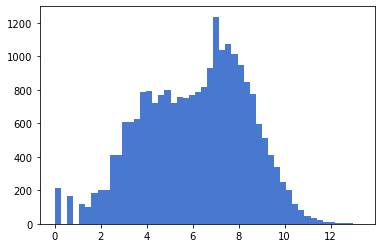

In [24]:
plt.hist(np.log(1+df['num_subscribers']), bins=50)

(array([6.840e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.600e+01, 3.000e+00,
        5.000e+00, 4.000e+00, 1.000e+00, 9.000e+00, 9.000e+00, 7.000e+00,
        2.000e+01, 7.000e+00, 4.900e+01, 2.500e+01, 4.100e+01, 6.000e+01,
        8.000e+00, 1.010e+02, 8.300e+01, 1.540e+02, 1.410e+02, 6.900e+01,
        3.170e+02, 2.540e+02, 4.730e+02, 4.880e+02, 2.620e+02, 8.180e+02,
        8.120e+02, 1.411e+03, 1.242e+03, 7.650e+02, 2.368e+03, 1.335e+03,
        1.987e+03, 2.187e+03, 1.862e+03, 2.175e+03, 8.460e+02, 8.540e+02,
        2.940e+02, 5.850e+02]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
        2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
        3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ]),
 <BarContainer object of 50 artists>)

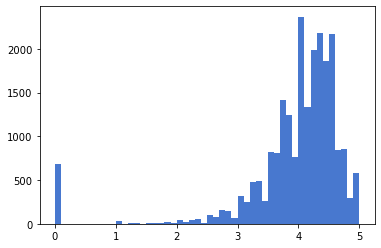

In [25]:
plt.hist(df['avg_rating'], bins=50)

### Number of courses created / published over the years

<AxesSubplot:xlabel='created'>

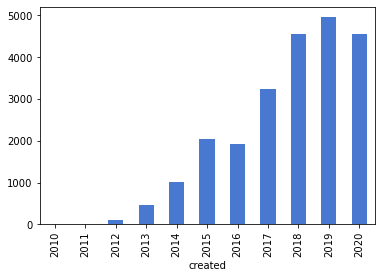

In [26]:
df.groupby(df["created"].dt.year)['id'].count().plot(kind="bar", legend=False)

<AxesSubplot:xlabel='published_time'>

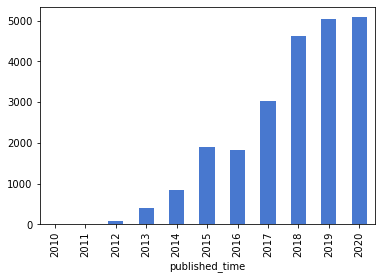

In [27]:
df.groupby(df["published_time"].dt.year)['id'].count().plot(kind="bar", legend=False)

In [87]:
df['title'].iloc[150:200]


150                       Understanding Unconscious Bias
151    How to Manage Difficult Conversations: Beginne...
152             Collaboration and Emotional Intelligence
153      Certificate in Qlik Sense Analytics Development
154    The Basics of Blockchain: Ethereum, Bitcoin, &...
155    Presentation Skills: Master Confident Presenta...
156    Interview Questions: Interview Like a Professi...
157    INTERVIEW TRAINING: Ask Better Questions, Hire...
158                          Learn about Content Writing
159    [BESTSELLER]™ Python Data Analysis & Visualiza...
160           Salesforce 101: Introduction to Salesforce
161                      Project Management Fundamentals
162    ISO 9001:2015 Quality Management System Audito...
163    Algorithmic Trading In Forex: Create Your Firs...
164    The Essential Guide to Entrepreneurship by Guy...
165    Think Strategically and Make Your Ideas a Reality
166           Manage Workplace Stress & Strike a Balance
167                           R

In [88]:
# is a beginner course
beginners_courses_idx = df['title'].str.contains('begin|start|intro|fundamental|basic|101|how to|foundation|rookie',case=False)
df['is_beginner'] = beginners_courses_idx


<AxesSubplot:title={'center':'Average # of subscribers'}, xlabel='is_beginner'>

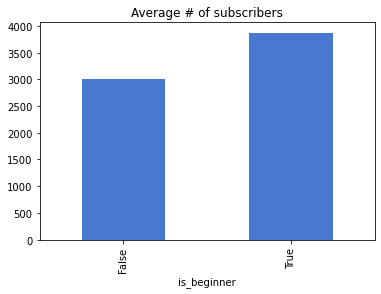

In [89]:
df.groupby(df["is_beginner"])['num_subscribers'].mean().plot(kind="bar", legend=False, title="Average # of subscribers")

In [90]:
advanced_idx = df['title'].str.contains('advanced|master|expert|professional',case=False)
df["is_advanced"] = advanced_idx

<AxesSubplot:title={'center':'Average # of subscribers'}, xlabel='is_advanced'>

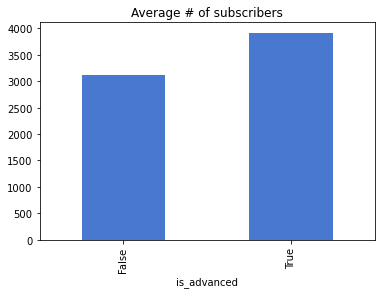

In [91]:
df.groupby(df["is_advanced"])['num_subscribers'].mean().plot(kind="bar", legend=False, title="Average # of subscribers")

In [140]:

from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from collections import Counter
from nltk.corpus import stopwords
import re

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

# Function to extract and stem the words from a column
def extract_terms(column):
    # Tokenize the words in the column
    words = word_tokenize(" ".join(df[column]))
    # Remove symbols and stopwords
    cleaned_words = [word for word in words if (word.isalpha() and word.lower() not in stop_words)]
    # Stem the words
    print('The' in cleaned_words)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in cleaned_words]
    # Count the most common terms
    print('lemmatized')
    print('The' in lemmatized_words)
    common_terms = [term[0] for term in Counter(lemmatized_words).most_common(10)]
    return (common_terms, lemmatized_words)

# Extract the terms from the 'text' column
common_terms, lemmatized_words = extract_terms("title")

False
lemmatized
False


In [133]:
'A'.lower() in stop_words

True

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

'a'

In [141]:
common_terms = [term for term in Counter(lemmatized_words).most_common(20)]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

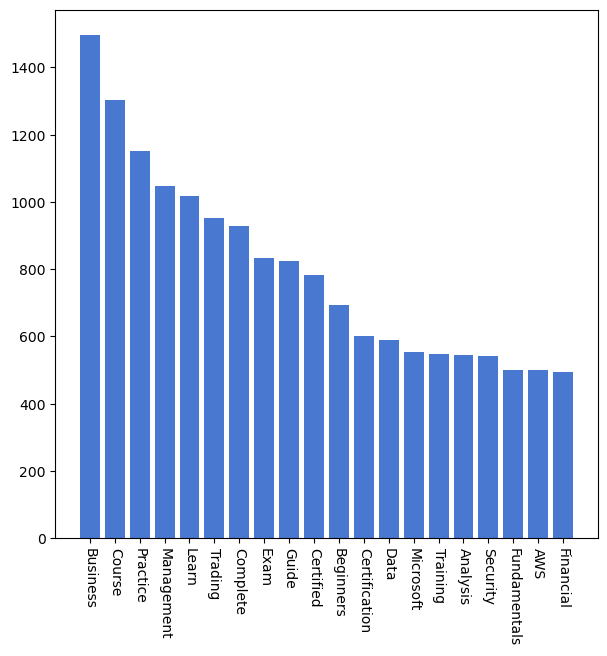

In [146]:
plt.figure(figsize=(7, 7), dpi=100)
plt.bar(*zip(*common_terms))
plt.xticks(rotation=-90)

In [149]:
pip install autosklearn

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement autosklearn (from versions: none)
ERROR: No matching distribution found for autosklearn


### Correlation matrix

In [36]:
corr = df.drop(columns=['id']).corr(method='spearman').round(2)

<AxesSubplot:>

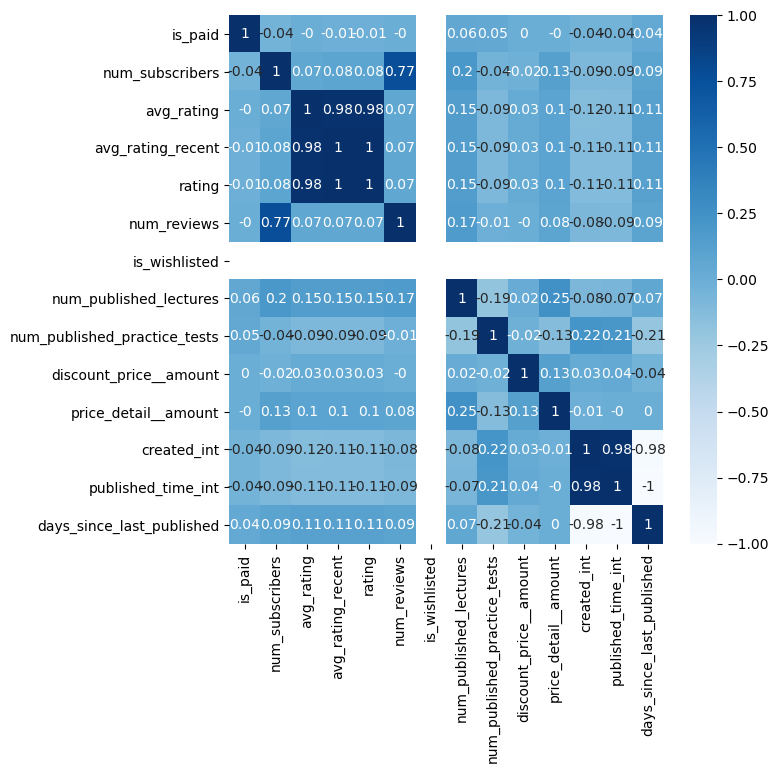

In [38]:
plt.figure(figsize=(7, 7), dpi=100)

sns.heatmap(corr,annot=True,xticklabels=True, cmap='Blues')

In [30]:
df.is_paid.value_counts()

True     22356
False      497
Name: is_paid, dtype: int64

In [31]:
pd.to_datetime(df['published_time']).max() #mention: data up to september 2020

Timestamp('2020-09-10 06:31:11+0000', tz='UTC')

####Days since last published

In [32]:
from pandas.io.formats.info import DataFrameTableBuilderNonVerbose
lastpublished = pd.to_datetime(df['published_time']).max()

df['days_since_last_published'] = (lastpublished - pd.to_datetime(df['published_time'])).dt.days  

In [33]:
df['days_since_last_published']

0        1618
1        1478
2        1030
3        1694
4        1703
         ... 
22848     955
22849     990
22850     721
22851     638
22852    1892
Name: days_since_last_published, Length: 22853, dtype: int64

In [ ]:
df['days_since_last_published'].corr(df['num_subscribers'])

0.08774825332799728

## Currency and NaNs

In [ ]:
df['discount_price__currency'].value_counts(dropna=False)

INR    21024
NaN     1829
Name: discount_price__currency, dtype: int64

In [ ]:
df['price_detail__currency'].value_counts(dropna=False)

INR    22356
NaN      497
Name: price_detail__currency, dtype: int64

In [ ]:
df.loc[df['price_detail__currency'].isna() & df['is_paid']] #outlier

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,...,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string,created_int,published_time_int
13607,2935720,Acabou a Previdência e agora? - Volume 03,/course/acabou-a-previdencia-e-agora-volume-03/,True,0,0.0,0.0,0.0,0,False,...,2020-03-30 19:10:58+00:00,2020-04-02 16:33:32+00:00,NaN,NaN,NaN,NaN,NaN,NaN,1585595458000000000,1585845212000000000


## Notes 
Incorporate published_time >> relevant for popularity. If more recent -> needs less subscribers

Treat as time series (take most recent data points for testing)

Add to additional data requirements: 
    When did subscribers subscribe (maximal number of subscribers over all years)
       there might be less subs now if the course is old and the content of the course is outdated etc.

Consider the old courses (2010-2014) because there are very few of them. How to handle them. The data is probably not relevant. 

Consider the updates of the courses (some are updated some are not) consider updated_timestamp (which are not present in current dataset).


Converting the price after modeling (for the company management)

✅ Avg/total number of subs per year (based on `published_time`). -> interesting for marketing and sales 

Is published date == updated date? unclear

✅ look at (published-created) distribution ---->>> Derived attribute (daysinbetweendates/int)

✅ Are there courses with same/similar titles? (e.g. `VU Business Intelligence WS2022` and `VU Business Intelligence WS2023`


## Courses with similar / same titles

In [ ]:
first_3_chars = df['title'].str[:30]
duplicated_rows = df[first_3_chars.duplicated()]
print(duplicated_rows.shape[0])
duplicated_rows.sort_values('title')

1133


,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,...,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string,created_int,published_time_int
22550,2662338,1Z0-068 : Oracle Database 12c: RAC and Grid Pr...,/course/1z0-068-oracle-database-12c-rac-and-gr...,True,116,4.83333,4.83896,4.83896,3,False,...,2019-11-19 05:58:01+00:00,2019-11-21 14:03:52+00:00,455.0,INR,₹455,1280.0,INR,"₹1,280",1574143081000000000,1574345032000000000
19111,3074042,1Z0-1072 Oracle Cloud Infrastructure 2019 Arch...,/course/1z0-1072-oracle-cloud-infrastructure-2...,True,68,4.22727,4.10804,4.10804,20,False,...,2020-04-30 22:30:57+00:00,2020-04-30 23:23:09+00:00,455.0,INR,₹455,1920.0,INR,"₹1,920",1588285857000000000,1588288989000000000
20327,3362370,1Z0-1084-20 Oracle Cloud Infrastructure Develo...,/course/1z0-1084-20-oracle-cloud-infrastructur...,True,107,4.59091,4.60577,4.60577,11,False,...,2020-07-24 17:29:59+00:00,2020-07-27 23:23:00+00:00,455.0,INR,₹455,1280.0,INR,"₹1,280",1595611799000000000,1595892180000000000
18334,3060372,1Z0-1085-20 Oracle Cloud Infrastructure Founda...,/course/1z0-1085-20-oracle-cloud-infrastructur...,True,61,4.45000,4.64272,4.64272,30,False,...,2020-04-27 19:35:08+00:00,2020-04-27 22:19:19+00:00,455.0,INR,₹455,1280.0,INR,"₹1,280",1588016108000000000,1588025959000000000
22812,3078234,1Z0-931 - Oracle Autonomous Database Cloud 201...,/course/1z0-931-oracle-autonomous-database-clo...,True,2,3.25000,3.05000,3.05000,2,False,...,2020-05-01 22:53:59+00:00,2020-05-02 01:19:42+00:00,455.0,INR,₹455,1280.0,INR,"₹1,280",1588373639000000000,1588382382000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19245,1665560,Windows Server 2016 with Powershell: Using WMI...,/course/windows-server-2016-with-powershell-us...,True,113,3.00000,3.10006,3.10006,19,False,...,2018-04-27 11:34:56+00:00,2018-05-02 19:44:20+00:00,455.0,INR,₹455,8640.0,INR,"₹8,640",1524828896000000000,1525290260000000000
21246,1551046,Windows Server 2016 with Powershell: Working w...,/course/windows-server-2016-with-powershell-wo...,True,86,4.71429,4.56666,4.56666,7,False,...,2018-02-12 09:44:42+00:00,2018-02-22 02:54:39+00:00,455.0,INR,₹455,7680.0,INR,"₹7,680",1518428682000000000,1519268079000000000
10481,951218,You can Pass the Certified Management Accounta...,/course/cma-exam-2-review-financial-decision-m...,True,141,3.91667,3.69408,3.69408,6,False,...,2016-09-06 05:39:11+00:00,2017-03-20 21:05:46+00:00,455.0,INR,₹455,1280.0,INR,"₹1,280",1473140351000000000,1490043946000000000
15449,2918344,[NEW] AWS Certified Cloud Practitioner From Sc...,/course/aws-certified-cloud-practitioner-exam-...,True,20011,4.22000,4.22587,4.22587,175,False,...,2020-03-27 04:13:54+00:00,2020-06-04 00:50:01+00:00,640.0,INR,₹640,2560.0,INR,"₹2,560",1585282434000000000,1591231801000000000


In [ ]:
# first_3_chars.duplicated()
#df.iloc[3,:]['title'][:12]
df.loc[df['title'].str.startswith(df.iloc[3,:]['title'][:12])]

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,...,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string,created_int,published_time_int
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,...,2016-02-14 22:57:48+00:00,2016-04-06 05:16:11+00:00,455.0,INR,₹455,8640.0,INR,"₹8,640",1455490668000000000,1459919771000000000
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,4.53772,46447,False,...,2015-10-23 13:34:35+00:00,2016-01-21 01:38:48+00:00,455.0,INR,₹455,8640.0,INR,"₹8,640",1445607275000000000,1453340328000000000
13,1288044,The Complete Foundation Stock Trading Course,/course/foundation-course/,True,76812,4.53878,4.54203,4.54203,21537,False,...,2017-07-11 17:01:20+00:00,2017-08-25 00:48:17+00:00,455.0,INR,₹455,8640.0,INR,"₹8,640",1499792480000000000,1503622097000000000
15,1202988,The Complete Financial Analyst Training & Inve...,/course/the-complete-financial-analyst-trainin...,True,182002,4.49571,4.49507,4.49507,21421,False,...,2017-05-03 17:04:31+00:00,2017-08-17 17:53:15+00:00,455.0,INR,₹455,8640.0,INR,"₹8,640",1493831071000000000,1502992395000000000
17,965832,The Complete Investment Banking Course 2020,/course/the-complete-investment-banking-course...,True,88468,4.49804,4.48929,4.48929,19970,False,...,2016-09-23 07:55:41+00:00,2016-10-10 16:16:26+00:00,455.0,INR,₹455,8640.0,INR,"₹8,640",1474617341000000000,1476116186000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21634,1689094,The Complete ADC conversion Library Course In PIC,/course/adc-conversion/,True,979,2.90000,2.54312,2.54312,5,False,...,2018-05-12 09:50:21+00:00,2018-05-15 20:35:39+00:00,455.0,INR,₹455,8640.0,INR,"₹8,640",1526118621000000000,1526416539000000000
22209,2339826,The Complete AutoCAD Course,/course/the-complete-autocad-course/,True,14,4.50000,4.43007,4.43007,4,False,...,2019-04-26 11:06:45+00:00,2019-07-23 22:28:25+00:00,455.0,INR,₹455,1920.0,INR,"₹1,920",1556276805000000000,1563920905000000000
22250,1453044,The Complete Linux System Administration Course,/course/complete-linux-system-course/,True,43,3.75000,2.88649,2.88649,4,False,...,2017-11-30 02:56:13+00:00,2017-12-01 21:04:26+00:00,455.0,INR,₹455,8640.0,INR,"₹8,640",1512010573000000000,1512162266000000000
22311,1794909,The Complete Guide to Ethical Hacking: Beginne...,/course/the-complete-guide-to-ethical-hacking-...,True,12,4.00000,4.02111,4.02111,3,False,...,2018-07-12 07:17:25+00:00,2018-07-13 18:54:29+00:00,455.0,INR,₹455,8640.0,INR,"₹8,640",1531379845000000000,1531508069000000000


In [ ]:
df.loc[ df['title'].duplicated(), 'title'].sort_values()

20327    1Z0-1084-20 Oracle Cloud Infrastructure Develo...
17808    70-480: Programming in HTML5 with JS & CSS3: P...
20266    70-764 Administering a SQL Database Infrastruc...
11378                              ACI Dealing Certificate
18168      AWS Certified Cloud Practitioner Practice Exams
                               ...                        
19076    The Agile Certified Practitioner Training Prog...
11681                           Understanding Credit Cards
18966                                           Windows 10
18354                                           Windows 10
16410                                           Windows 10
Name: title, Length: 103, dtype: object

Text(0, 0.5, '# of courses with this name')

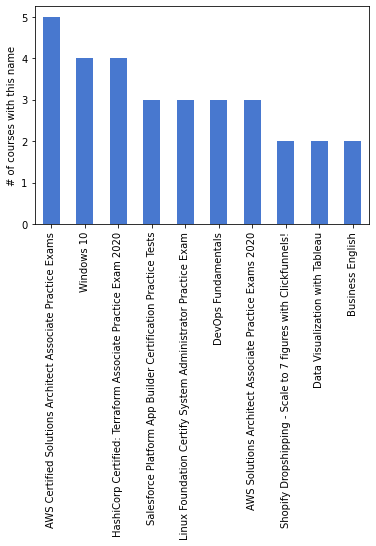

In [ ]:
df['title'].value_counts().loc[df['title'].value_counts() > 1].nlargest(10).plot(kind="bar")
plt.ylabel("# of courses with this name")

In [ ]:
print(f"All courses with name: {df['title'].value_counts().loc[df['title'].value_counts() > 1].nlargest(1).index[0]}\n (the course with the most identical titles)")

All courses with name: AWS Certified Solutions Architect Associate Practice Exams
 (the course with the most identical titles)


In [ ]:
most_frequent_course_instances= df.loc[df['title'] == df['title'].value_counts().loc[df['title'].value_counts() > 1].nlargest(1).index[0]]

In [ ]:
most_frequent_course_instances['created']

13634   2018-01-22 01:22:04+00:00
13713   2018-08-27 02:20:35+00:00
17107   2020-01-02 06:14:20+00:00
17264   2020-05-12 06:34:26+00:00
19582   2020-01-28 22:56:56+00:00
Name: created, dtype: datetime64[ns, UTC]

In [ ]:
(df['url'].duplicated()).any()

False

In [ ]:
df.loc[ df['title'] == df.loc[ 18168, 'title']]['url'][14054]

'/course/aws-certified-cloud-practitioner-practice-exams-amazon/'

In [ ]:
df.loc[ df['title'] == df.loc[ 18168, 'title']]['url'][18168]


'/course/aws-certified-cloud-practitioner-practice-exam-o/'

## Published - created distribution

In [3]:
date_diff = (df['published_time'] - df['created']).dt.days

NameError: name 'df' is not defined

In [ ]:
date_diff.describe()

count    22853.000000
mean        49.519275
std        124.580745
min         -1.000000
25%          3.000000
50%         12.000000
75%         40.000000
max       2186.000000
dtype: float64

Mean is 50, but Median (0.5 quantile) is more robust towards outliers -> on average we could say that 12 days passes between course creation and course publishing.

There is -1??? (published one day before created)

In [ ]:
df.loc[date_diff == -1]

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,...,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string,created_int,published_time_int
686,2762,Simple Strategy for Swing Trading the Stock Ma...,/course/swing-trading-the-stock-market/,True,2268,4.21642,4.22936,4.22936,674,False,...,2010-04-14 21:32:46+00:00,2010-04-14 16:32:46+00:00,468.0,INR,₹468,2560.0,INR,"₹2,560",1271280766000000000,1271262766000000000


Following is the distribution of the date differences (y on the log scale)

Text(0, 0.5, 'Frequency')

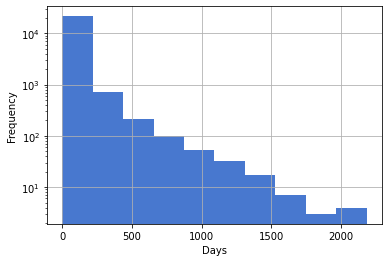

In [ ]:
date_diff.hist( log=True)
plt.xlabel('Days')
plt.ylabel('Frequency')

## Avg num of subscribers / rating for paid vs free courses

Text(0, 0.5, 'Number of subscribers')

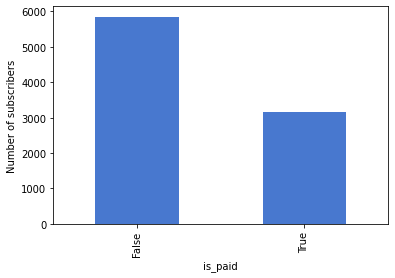

In [ ]:
df.groupby(df["is_paid"])['num_subscribers'].mean().plot(kind="bar", legend=False)
plt.ylabel("Average Number of subscribers")

Text(0, 0.5, 'Average Number of subscribers')

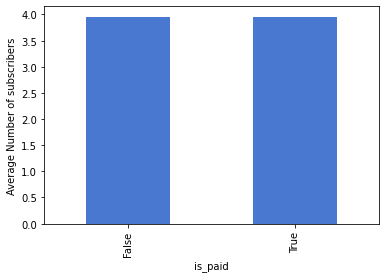

In [ ]:
df.groupby(df["is_paid"])['avg_rating'].mean().plot(kind="bar", legend=False)
plt.ylabel("Mean Average Rating")

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,...,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string,created_int,published_time_int
10898,2542935,Learn the truth about wealth creation,/course/truth-about-wealth-creation/,True,0,3.0,3.0,3.0,1,False,...,2019-09-04 08:01:03+00:00,2019-09-11 00:23:58+00:00,455.0,INR,₹455,1280.0,INR,"₹1,280",1567584063000000000,1568161438000000000
10950,3106416,Series 7 tests by topic + Full Exam,/course/series-7-tests/,True,0,5.0,5.0,5.0,1,False,...,2020-05-09 03:22:29+00:00,2020-05-17 20:37:30+00:00,NaN,NaN,NaN,2240.0,INR,"₹2,240",1588994549000000000,1589747850000000000
11080,3482886,Forex Online Course - Beginners / Intermediate...,/course/forex-online-course-2020-telegramfx/,True,0,0.0,0.0,0.0,0,False,...,2020-09-07 21:02:55+00:00,2020-09-09 02:24:43+00:00,455.0,INR,₹455,8640.0,INR,"₹8,640",1599512575000000000,1599618283000000000
11085,1264992,Learn to buy: Stop making emotional purchases,/course/learn-to-buy-stop-making-emotional-pur...,True,0,0.0,0.0,0.0,0,False,...,2017-06-22 19:54:40+00:00,2017-08-16 16:42:42+00:00,455.0,INR,₹455,1280.0,INR,"₹1,280",1498161280000000000,1502901762000000000
11087,2416248,Simple Guide to Crypto Investing,/course/simple-guide-to-crypto-investing/,True,0,0.0,0.0,0.0,0,False,...,2019-06-16 18:01:58+00:00,2019-06-24 18:37:55+00:00,455.0,INR,₹455,4800.0,INR,"₹4,800",1560708118000000000,1561401475000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13372,3158262,Destrave suas finanças,/course/destrave-suas-financas/,True,0,0.0,0.0,0.0,0,False,...,2020-05-22 18:36:59+00:00,2020-05-31 12:19:38+00:00,455.0,INR,₹455,1280.0,INR,"₹1,280",1590172619000000000,1590927578000000000
13384,2516738,Como gerir suas finanças pessoais,/course/idce-como-gerir-suas-financas-pessoais/,True,0,0.0,0.0,0.0,0,False,...,2019-08-19 16:34:48+00:00,2019-08-20 19:12:46+00:00,NaN,NaN,NaN,1280.0,INR,"₹1,280",1566232488000000000,1566328366000000000
13386,2654128,Trading Básico con BITPoint Academy,/course/trading-basico-con-bitpoint-academy/,True,0,0.0,0.0,0.0,0,False,...,2019-11-13 14:32:31+00:00,2019-12-05 19:47:51+00:00,455.0,INR,₹455,1280.0,INR,"₹1,280",1573655551000000000,1575575271000000000
13391,2832286,Trading: Indices NQ,/course/aprende-trading-de-indices-nq/,True,0,0.0,0.0,0.0,0,False,...,2020-02-23 21:59:19+00:00,2020-06-06 20:24:19+00:00,455.0,INR,₹455,2240.0,INR,"₹2,240",1582495159000000000,1591475059000000000


On averagefree courses have around two times more subscribers than paid courses, while both paid and free courses have approximately equal mean average ratings. (Mean average because the `avg_rating` is already an average)

### Courses with no subscribers

In [ ]:
df.loc[df["num_subscribers"] < 1]

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,...,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string,created_int,published_time_int
10898,2542935,Learn the truth about wealth creation,/course/truth-about-wealth-creation/,True,0,3.0,3.0,3.0,1,False,...,2019-09-04 08:01:03+00:00,2019-09-11 00:23:58+00:00,455.0,INR,₹455,1280.0,INR,"₹1,280",1567584063000000000,1568161438000000000
10950,3106416,Series 7 tests by topic + Full Exam,/course/series-7-tests/,True,0,5.0,5.0,5.0,1,False,...,2020-05-09 03:22:29+00:00,2020-05-17 20:37:30+00:00,NaN,NaN,NaN,2240.0,INR,"₹2,240",1588994549000000000,1589747850000000000
11080,3482886,Forex Online Course - Beginners / Intermediate...,/course/forex-online-course-2020-telegramfx/,True,0,0.0,0.0,0.0,0,False,...,2020-09-07 21:02:55+00:00,2020-09-09 02:24:43+00:00,455.0,INR,₹455,8640.0,INR,"₹8,640",1599512575000000000,1599618283000000000
11085,1264992,Learn to buy: Stop making emotional purchases,/course/learn-to-buy-stop-making-emotional-pur...,True,0,0.0,0.0,0.0,0,False,...,2017-06-22 19:54:40+00:00,2017-08-16 16:42:42+00:00,455.0,INR,₹455,1280.0,INR,"₹1,280",1498161280000000000,1502901762000000000
11087,2416248,Simple Guide to Crypto Investing,/course/simple-guide-to-crypto-investing/,True,0,0.0,0.0,0.0,0,False,...,2019-06-16 18:01:58+00:00,2019-06-24 18:37:55+00:00,455.0,INR,₹455,4800.0,INR,"₹4,800",1560708118000000000,1561401475000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13372,3158262,Destrave suas finanças,/course/destrave-suas-financas/,True,0,0.0,0.0,0.0,0,False,...,2020-05-22 18:36:59+00:00,2020-05-31 12:19:38+00:00,455.0,INR,₹455,1280.0,INR,"₹1,280",1590172619000000000,1590927578000000000
13384,2516738,Como gerir suas finanças pessoais,/course/idce-como-gerir-suas-financas-pessoais/,True,0,0.0,0.0,0.0,0,False,...,2019-08-19 16:34:48+00:00,2019-08-20 19:12:46+00:00,NaN,NaN,NaN,1280.0,INR,"₹1,280",1566232488000000000,1566328366000000000
13386,2654128,Trading Básico con BITPoint Academy,/course/trading-basico-con-bitpoint-academy/,True,0,0.0,0.0,0.0,0,False,...,2019-11-13 14:32:31+00:00,2019-12-05 19:47:51+00:00,455.0,INR,₹455,1280.0,INR,"₹1,280",1573655551000000000,1575575271000000000
13391,2832286,Trading: Indices NQ,/course/aprende-trading-de-indices-nq/,True,0,0.0,0.0,0.0,0,False,...,2020-02-23 21:59:19+00:00,2020-06-06 20:24:19+00:00,455.0,INR,₹455,2240.0,INR,"₹2,240",1582495159000000000,1591475059000000000


In [ ]:
df.loc[df["num_subscribers"] < 1][df["num_reviews"] >= 1]

<ipython-input-36-01bd099cb5b5>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.loc[df["num_subscribers"] < 1][df["num_reviews"] >= 1]


,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,...,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string,created_int,published_time_int
10898,2542935,Learn the truth about wealth creation,/course/truth-about-wealth-creation/,True,0,3.00,3.00000,3.00000,1,False,...,2019-09-04 08:01:03+00:00,2019-09-11 00:23:58+00:00,455.0,INR,₹455,1280.0,INR,"₹1,280",1567584063000000000,1568161438000000000
10950,3106416,Series 7 tests by topic + Full Exam,/course/series-7-tests/,True,0,5.00,5.00000,5.00000,1,False,...,2020-05-09 03:22:29+00:00,2020-05-17 20:37:30+00:00,NaN,NaN,NaN,2240.0,INR,"₹2,240",1588994549000000000,1589747850000000000
12905,3149864,Planilha Pronta - Conciliação Bancária,/course/planilha-pronta-conciliacao-bancaria/,True,0,2.75,3.19403,3.19403,2,False,...,2020-05-20 12:44:32+00:00,2020-05-20 14:27:28+00:00,455.0,INR,₹455,1280.0,INR,"₹1,280",1589978672000000000,1589984848000000000
13049,3428016,Forex MasterClass de Cero a Avanzado- Ejemplos...,/course/forex-masterclass-de-cero-a-avanzado-e...,True,0,5.00,5.00000,5.00000,1,False,...,2020-08-17 23:59:30+00:00,2020-08-21 21:34:31+00:00,NaN,NaN,NaN,12800.0,INR,"₹12,800",1597708770000000000,1598045671000000000


## Number of subscribers over the years for all courses

---



Text(0, 0.5, 'Total Number of subscribers')

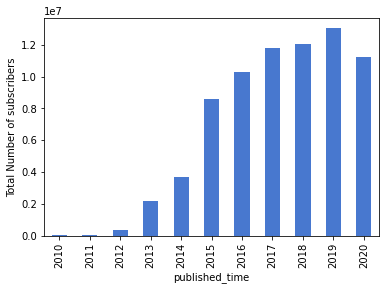

In [ ]:
df.groupby(df["published_time"].dt.year)['num_subscribers'].sum().plot(kind="bar", legend=False)
plt.ylabel('Total Number of subscribers')

Text(0, 0.5, 'Average Number of subscribers')

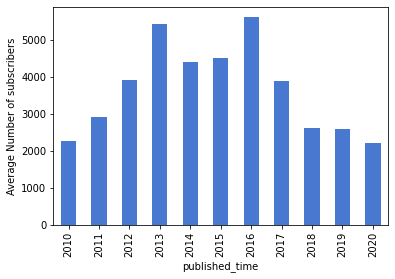

In [ ]:
df.groupby(df["published_time"].dt.year)['num_subscribers'].mean().plot(kind="bar", legend=False)
plt.ylabel('Average Number of subscribers')

The first plot could be informative for the sales department. As expected with any company, after reaching the saturation of users, the total number of subscribers per year does not change drastically after a certain point.
 
Second, not so sure where it could be used. Maybe to analyze the average course quality over the years. i.e. maybe the content of the courses from 2013 and 2016 was of higher quality on average than for other years

## Modeling

## Splitting the data

### Establishing a baseline

### Model selection

### Hyperparameter tuning

### Final model training

### Model evaluation

## Results discussion / analysis